[58 深层循环神经网络](https://www.bilibili.com/video/BV1JM4y1T7N4/?spm_id_from=333.788.recommend_more_video.0)
- 更深的循环神经网络，更深的隐藏层
- <img src="./picture/屏幕截图 2022-06-08 004658.png">

- 深度循环神经网络使用多个隐藏层来获得更多的非线性性

假设在时间步$(t)$有一个小批量的输入数据 $(\mathbf{X}_t \in \mathbb{R}^{n \times d})$ （样本数：(n)，每个样本中的输入数：(d)）。 同时，将$(l^\mathrm{th})$隐藏层（$(l=1,\ldots,L)$） 的隐状态设为$(\mathbf{H}_t^{(l)} \in \mathbb{R}^{n \times h})$ （隐藏单元数：\(h\)）， 输出层变量设为$(\mathbf{O}_t \in \mathbb{R}^{n \times q})$ （输出数：(q)）。 设置$(\mathbf{H}_t^{(0)} = \mathbf{X}_t)$， 第(l)个隐藏层的隐状态使用激活函数$(\phi_l)$，则：

(9.3.1)$[\mathbf{H}_t^{(l)} = \phi_l(\mathbf{H}_t^{(l-1)} \mathbf{W}_{xh}^{(l)} + \mathbf{H}_{t-1}^{(l)} \mathbf{W}_{hh}^{(l)} + \mathbf{b}_h^{(l)}),]$
其中，权重$(\mathbf{W}_{xh}^{(l)} \in \mathbb{R}^{h \times h})$， $(\mathbf{W}_{hh}^{(l)} \in \mathbb{R}^{h \times h})$和 偏置$(\mathbf{b}_h^{(l)} \in \mathbb{R}^{1 \times h})$ 都是第(l)个隐藏层的模型参数。

最后，输出层的计算仅基于第\(l\)个隐藏层最终的隐状态：

(9.3.2)$[\mathbf{O}_t = \mathbf{H}_t^{(L)} \mathbf{W}_{hq} + \mathbf{b}_q,]$
其中，权重$(\mathbf{W}_{hq} \in \mathbb{R}^{h \times q})$和偏置$(\mathbf{b}_q \in \mathbb{R}^{1 \times q})$都是输出层的模型参数。

与多层感知机一样，隐藏层数目(L)和隐藏单元数目(h)都是超参数。 也就是说，它们可以由我们调整的。 另外，用门控循环单元或长短期记忆网络的隐状态 来代替 (9.3.1)中的隐状态进行计算， 可以很容易地得到深度门控循环神经网络或深度长短期记忆神经网络。

In [1]:
# 简洁实现
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [2]:
# 通过num_layers来设置隐藏层的层数
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device = d2l.try_gpu()
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
# 自己实现的话，核心函数就是这个了
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

perplexity 1.2, 263824.2 tokens/sec on cuda:0
time traveller hed fim think so i ge back theer at and whysht in
traveller with a siid finet ane is to bedican the time trav


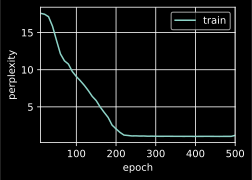

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)